In [29]:
import pandas as pd

# 1 задача

In [30]:
df = pd.read_csv('data_1.csv')

In [31]:
df.head()

,id,X,Y
0,1,25,55
1,2,1,5
2,3,19,54
3,4,4,10
4,5,22,43


In [32]:
df.X.mean()

11.9

In [33]:
df.Y.mean()

29.2

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(df[['X']], df['Y'])

LinearRegression()

In [36]:
model.coef_

array([2.11425828])

In [37]:
b = model.predict([[2]]) - 2 * model.coef_

In [38]:
b

array([4.04032645])

In [39]:
import seaborn as sns
import numpy as np

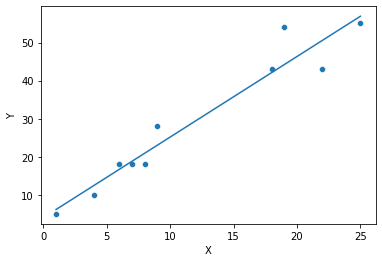

In [40]:
sns.scatterplot(
    x=df['X'],
    y=df['Y']
)

x = np.linspace(df['X'].min(), df['X'].max(), 2)
y = x * model.coef_[0] + b

sns.lineplot(x=x, y=y)

In [52]:
import sklearn

In [54]:
sklearn.metrics.r2_score(df['Y'], model.predict(df[['X']]))

0.660747627938879

# 2 задача

In [81]:
df = pd.read_csv('candy-data.csv')

In [82]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [88]:
train = df.query("competitorname not in ['Caramel Apple Pops', 'Hersheys Kisses']")
test = df.query("competitorname in ['Caramel Apple Pops', 'Hersheys Kisses']")

In [89]:
x_real = ['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent']

In [90]:
model = LinearRegression()
model.fit(train[x_real], train['winpercent'])

LinearRegression()

In [95]:
test

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681,0
22,Hersheys Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,1


In [93]:
model.predict(test[x_real])

array([53.68280247, 58.8607841 ])

In [97]:
model.predict([[1, 0, 0, 1, 1, 0, 0, 1, 1, 0.624, 0.438]])

array([64.69721336])